### Linear Regression

#### Predict House Price Based on Boston Housing Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston) and has been used extensively throughout the literature to benchmark algorithms. 

There are 14 attributes in each case of the dataset. They are:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars.
- PTRATIO - pupil-teacher ratio by town
- BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000 dollars

### Importing Libraries

In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

In [2]:
# load Boston Dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
data = pd.read_csv('Boston.csv', index_col=0)

# display the first 10 records
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


**Now let's fit a simple linear model (OLS - for "ordinary least squares" method) with MEDV as the target variable and the others as the predictors:**

In [4]:
# use the first 13 attributes as independent varibles 
features = list(data.columns[0:13])

features

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [5]:
# use the names of attributes to split them into independent variables X and target variable y

X = data[features]
y = data['medv']

In [6]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [7]:
# Show the descriptive statistics of the training dataset (before normalization)
X.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
from sklearn import preprocessing
# Apply z-score normalization on all explanatory attributes

zscore_scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(zscore_scaler.transform(X), columns = X.columns)


In [9]:
# Show the descriptive statistics of the normalized training dataset
X.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.688702e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.978968e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


#### Use Cross validation to evaluate the model

In [10]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [11]:
# Import Linear Regression Model from sklearn
from sklearn.linear_model import LinearRegression

# Define model to be linear regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm = LinearRegression()


In [12]:
score_cv = cross_val_score(lm, X, y, scoring = 'neg_mean_squared_error', cv=10)

In [13]:
score_cv

array([  -9.28694671,  -14.15128316,  -14.07360615,  -35.20692433,
        -31.88511666,  -19.83587796,   -9.94726918, -168.37537954,
        -33.32974507,  -10.96041068])

In [14]:
-score_cv.mean()

34.705255944524815

In [15]:
pred_y = cross_val_predict(lm, X, y, cv=10)

In [16]:
pred_y

array([30.04900564, 24.73268691, 30.36234996, 28.32103823, 27.54679474,
       24.95005201, 22.76828807, 18.96826752, 10.69099639, 18.38869103,
       18.32600667, 21.2151136 , 20.67482233, 19.40202976, 19.02252621,
       19.19247283, 20.53108732, 16.56719839, 16.14556027, 18.27871067,
       12.06183163, 17.36395791, 15.35782636, 13.30827225, 15.25002158,
       13.00072901, 15.07032347, 14.23138876, 19.13481689, 20.50406407,
       10.88711375, 17.71425893,  8.10328694, 13.88702754, 13.18400457,
       23.76248399, 22.26475553, 23.09795323, 22.88603574, 31.66165856,
       34.54324123, 27.90889033, 25.13715879, 24.49149475, 22.69695788,
       21.9712375 , 20.16998059, 17.4184761 ,  8.1817061 , 16.73776047,
       20.93195787, 24.23669423, 27.85360352, 24.36110652, 15.43299525,
       31.19077366, 24.97280986, 33.54851394, 21.77252458, 21.24357737,
       17.97092977, 18.56991958, 23.97640077, 22.23963354, 22.80526009,
       31.05850231, 26.28564522, 21.38462876, 17.6842577 , 21.04

#### Fit the model and get the coefficents

In [17]:
# train model use all the training data
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
lm.fit(X, y)

LinearRegression()

In [18]:
# show the intercept of the trained model (Theta_0)
lm.intercept_

22.532806324110673

In [19]:
lm.coef_

array([-0.92814606,  1.08156863,  0.1409    ,  0.68173972, -2.05671827,
        2.67423017,  0.01946607, -3.10404426,  2.66221764, -2.07678168,
       -2.06060666,  0.84926842, -3.74362713])

In [20]:
# show the coefficients of independent attributes
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
crim,-0.928146
zn,1.081569
indus,0.140900
chas,0.681740
nox,-2.056718
rm,2.674230
age,0.019466
dis,-3.104044
rad,2.662218
tax,-2.076782


### LASSO Regression

- **We will do Lasso regression next to see how it controls model complexity and eliminate not informative features.**

In [21]:
# Import Lasso Model from sklearn
from sklearn.linear_model import Lasso

In [22]:
# Define model to be Lasso, set alpha=0.1 (alpha is the regularization parameter)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
lasso = Lasso(alpha = 0.1)

In [23]:
score_lasso = cross_val_score(lasso, X, y, scoring = 'neg_mean_squared_error', cv=10)

In [24]:
score_lasso

array([  -8.4635636 ,  -12.54437168,  -11.98922622,  -37.4788452 ,
        -28.42809475,  -20.81820116,   -9.16112616, -166.57117051,
        -36.27038229,   -9.37447051])

In [25]:
-score_lasso.mean()

34.10994520621787

In [26]:
# train model using whole dataset
lasso.fit(X, y)

Lasso(alpha=0.1)

In [27]:
# show the intercept of the trained model (Theta_0)
lasso.intercept_

22.532806324110673

In [28]:
# show the coefficients of independent attributes
coeff_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
crim,-0.632304
zn,0.708409
indus,-0.000000
chas,0.657607
nox,-1.574193
rm,2.826269
age,-0.000000
dis,-2.422079
rad,1.195937
tax,-0.846468


In [29]:
coeff_df1 = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])  
coeff_df1

,Coefficient
crim,-0.632304
zn,0.708409
indus,-0.000000
chas,0.657607
nox,-1.574193
rm,2.826269
age,-0.000000
dis,-2.422079
rad,1.195937
tax,-0.846468


**Note that both the coefficients of 'indus' and 'age' become zero.**

**Let's compare the magnitudes of coefficients under linear regression and Lasso regression.**

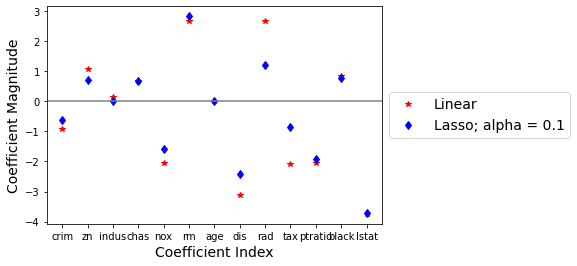

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(lm.coef_,linestyle='none',marker='*',markersize=6,color='red',label='Linear') 

plt.plot(lasso.coef_,linestyle='none',marker='d',markersize=6,color='blue',label='Lasso; alpha = 0.1') 

# draw a horizontal line at 0.
plt.axhline(y=0, color='grey', linestyle='-')

plt.xlabel('Coefficient Index',fontsize=14)
plt.ylabel('Coefficient Magnitude',fontsize=14)
#plt.legend(fontsize=13,loc=10)
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(13), (features), fontsize=10)
plt.show()